In [184]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

# NYTimes Bestselling List
### Available data: Title, Author, Publisher, Description, Weeks on Best Selling list

In [2]:
# html = requests.get('https://www.barnesandnoble.com/b/books/_/N-1fZ29Z8q8')
html = requests.get('https://www.nytimes.com/books/best-sellers/combined-print-and-e-book-fiction/', timeout=(5, 30))

In [3]:
# soup = BeautifulSoup(html.text, 'html5lib')
soup = BeautifulSoup(html.text, 'html5lib')


In [4]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <meta charset="utf-8"/>
  <title data-rh="true">
   Combined Print &amp; E-Book Fiction - Best Sellers - Books
  </title>
  <meta content="The New York Times Best Sellers are up-to-date and authoritative lists of the most popular books in the United States, based on sales in the past week, including fiction, non-fiction, paperbacks, children’s books, audiobooks, graphic books and more." data-rh="true" name="description"/>
  <meta content="noarchive" data-rh="true" name="robots"/>
  <meta content="Combined Print &amp; E-Book Fiction - Best Sellers - Books - The New York Times" data-rh="true" property="twitter:title"/>
  <meta content="https://www.nytimes.com/books/best-sellers/combined-print-and-e-book-fiction/" data-rh="true" property="twitter:url"/>
  <meta content="The New York Times Best Sellers are up-to-date and authoritative lists of the most popular books in the United States, based on sal

In [5]:
titles=[]
descriptions=[]
for title in soup.findAll('h3'):
    titles.append(title)

In [16]:
titles = [title.text for title in titles]
titles

['Books|Best Sellers',
 'IT ENDS WITH US',
 'IT STARTS WITH US',
 'LESSONS IN CHEMISTRY',
 'VERITY',
 'HEART BONES',
 'THE SEVEN HUSBANDS OF EVELYN HUGO',
 'TOMORROW, AND TOMORROW, AND TOMORROW',
 'UGLY LOVE',
 'DEMON COPPERHEAD',
 'EXILES',
 'THE SILENT PATIENT',
 'THE HOUSE IN THE PINES',
 'NOVEMBER 9',
 'THINGS WE NEVER GOT OVER',
 'DAISY JONES & THE SIX',
 'The New York Times Book Review',
 'Best Sellers Methodology',
 'Best Sellers Symbol Key',
 'Fiction',
 'Nonfiction',
 'CHILDREN’S']

In [17]:
publishers = soup('p', attrs={'class':'css-heg334'})
publishers = [publisher.text for publisher in publishers]
publishers

['Atria',
 'Atria',
 'Doubleday',
 'Grand Central',
 'Atria',
 'Washington Square/Atria',
 'Knopf',
 'Atria',
 'Harper',
 'Flatiron',
 'Celadon',
 'Dutton',
 'Atria',
 'Bloom',
 'Ballantine']

In [18]:
authors = soup('p', attrs={'class':'css-hjukut'})
authors = [author.text for author in authors]
authors

['by Colleen Hoover',
 'by Colleen Hoover',
 'by Bonnie Garmus',
 'by Colleen Hoover',
 'by Colleen Hoover',
 'by Taylor Jenkins Reid',
 'by Gabrielle Zevin',
 'by Colleen Hoover',
 'by Barbara Kingsolver',
 'by Jane Harper',
 'by Alex Michaelides',
 'by Ana Reyes',
 'by Colleen Hoover',
 'by Lucy Score',
 'by Taylor Jenkins Reid']

In [24]:
weeks_on_list = soup('p', attrs={'class':'css-1o26r9v'})
weeks_on_list = [week.text for week in weeks_on_list]
weeks_on_list

['86 weeks on the list',
 '16 weeks on the list',
 '13 weeks on the list',
 '61 weeks on the list',
 'New this week',
 '83 weeks on the list',
 '8 weeks on the list',
 '56 weeks on the list',
 '13 weeks on the list',
 'New this week',
 '57 weeks on the list',
 '5 weeks on the list',
 '36 weeks on the list',
 '2 weeks on the list',
 '6 weeks on the list']

In [25]:
descriptions = soup('p', attrs={'class':'css-14lubdp'})
descriptions = [description.text for description in descriptions]
descriptions

['A battered wife raised in a violent home attempts to halt the cycle of abuse.',
 'In the sequel to “It Ends With Us,” Lily deals with her jealous ex-husband as she reconnects with her first boyfriend.',
 'A scientist and single mother living in California in the 1960s becomes a star on a TV cooking show.',
 'Lowen Ashleigh is hired by the husband of an injured writer to complete her popular series and uncovers a horrifying truth.',
 'After an unexpected death prevents her from going to Penn State and and forces her to move in with her absent father, Beyah Grim has a summer fling with the rich guy next door.',
 'A movie icon recounts stories of her loves and career to a struggling magazine writer.',
 'Two friends find their partnership challenged in the world of video game design.',
 "Tate Collins and Miles Archer,\xa0an airline pilot, think they can handle a no strings attached arrangement. But they can't.",
 'A reimagining of Charles Dickens’s “David Copperfield” set in the mountain

# Wikipedia Best Selling all time
### Data Available: Title, Author, Language, Date, Copies sold, Genre

In [104]:
html = requests.get('https://en.wikipedia.org/wiki/List_of_best-selling_books', timeout=(5, 30))
soup = BeautifulSoup(html.text, 'html5lib')

In [105]:
for titles in soup.find_all('a', href=True):
    print(titles.get_attribute_list('title'))

[None]
[None]
['Search Wikipedia [f]']
['You are encouraged to create an account and log in; however, it is not mandatory']
[None]
['[o]']
[None]
['Discussion about edits from this IP address [n]']
['A list of edits made from this IP address [y]']
['Visit the main page [z]']
['Guides to browsing Wikipedia']
['Articles related to current events']
['Visit a randomly selected article [x]']
['Learn about Wikipedia and how it works']
['How to contact Wikipedia']
['Support us by donating to the Wikimedia Foundation']
['Guidance on how to use and edit Wikipedia']
['Learn how to edit Wikipedia']
['The hub for editors']
['A list of recent changes to Wikipedia [r]']
['Add images or other media for use on Wikipedia']
['List of all English Wikipedia pages containing links to this page [j]']
['Recent changes in pages linked from this page [k]']
['Upload files [u]']
['A list of all special pages [q]']
['Permanent link to this revision of this page']
['More information about this page']
['Information

In [143]:
titles = set()
authors = set()
genres = set()
trash = set()
languages = []
dates = []
sales = []
genres = []
info = []
counter = 0
for items in soup.find_all('table'):
    counter+=1
    for books in items.find_all('tr'):
        for columns in books.find_all('td'):

            info.append(columns.text)
    if counter == 3:
        break

In [172]:
titles = info[0::6]
titles = [title.rstrip() for title in titles]


authors = info[1::6]
authors = [author.rstrip() for author in authors]


languages = info[2::6]
languages = [language.rstrip() for language in languages]


dates = info[3::6]
dates = [int(re.findall('[0-9]+', date)[0]) for date in dates]

copies_sold = info[4::6]
copies_sold = [int(re.findall('[0-9]+', copies)[0]) for copies in copies_sold]

genres =info[5::6]
genres = [genre.lower().rstrip() for genre in genres]


In [176]:


df = pd.DataFrame(list(zip(titles, authors, languages, dates, copies_sold, genres)),
               columns =['Title', 'Author', 'Language', 'Publication Date', 'Copies Sold (millions)', 'Genre'])

df

,Title,Author,Language,Publication Date,Copies Sold (millions),Genre
0,Don Quixote,Miguel de Cervantes,Spanish,1605,500,adventure fiction
1,A Tale of Two Cities,Charles Dickens,English,1859,200,historical fiction
2,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200,novella
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120,fantasy
4,And Then There Were None,Agatha Christie,English,1939,100,mystery
...,...,...,...,...,...,...
102,The Secret,Rhonda Byrne,English,2006,20,self-help
103,Fear of Flying,Erica Jong,English,1973,20,romantic novel
104,Dune,Frank Herbert,English,1965,20,science fiction novel
105,Charlie and the Chocolate Factory,Roald Dahl,English,1964,20,children's fantasy novel


In [182]:
df['Language'].value_counts()

English       82
Russian        6
Spanish        2
French         2
Chinese        2
Hindi          2
German         2
Italian        2
Norwegian      2
Portuguese     1
Dutch          1
Swedish        1
Japanese       1
Czech          1
Name: Language, dtype: int64

In [189]:
df['Genre'].value_counts()

fantasy                                                 10
novel                                                    8
self-help                                                7
fiction                                                  3
children's literature                                    3
                                                        ..
christian literature                                     1
bildungsroman, historical fiction                        1
gothic novel                                             1
dystopian, political fiction, social science fiction     1
social science, anthropology, psychology                 1
Name: Genre, Length: 73, dtype: int64

<AxesSubplot:xlabel='Publication Date', ylabel='Count'>

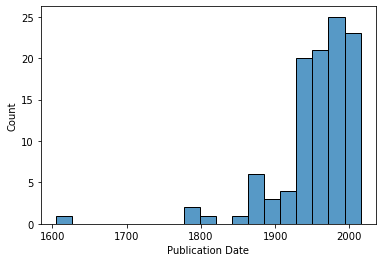

In [186]:
sns.histplot(data=df, x='Publication Date')

<AxesSubplot:xlabel='Genre', ylabel='Copies Sold (millions)'>

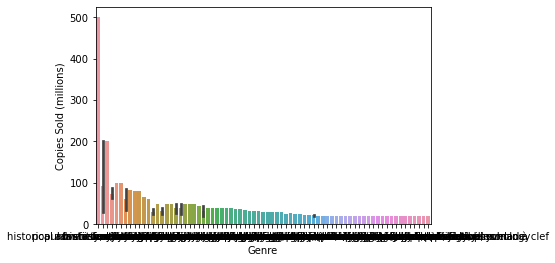

In [185]:
sns.barplot(data=df, x='Genre', y='Copies Sold (millions)')

In [100]:
# titles = set()
# authors = set()
# genres = set()
# trash = set()
# rows = set()
# languages = []
# dates = []
# sales = []
# genres = []
# counter = 0
# for items in soup.find_all('table'):
#     for books in items.find_all('tr'):
#         for columns in books.find_all('td'):
#                 for titles_authors in books.find_all('a', href=True):
#                     rows.add(titles_authors.text)
# rows

{'',
 'Miguel de Cervantes',
 'The Little Prince',
 'Miffy',
 'Sōhachi Yamaoka',
 'Ann Martin',
 'Social Science',
 '[313]',
 'H. Rider Haggard',
 'Richard Bach',
 'Jacques-Henri Bernardin de Saint-Pierre',
 'Nagaru Tanigawa',
 'Carolyn Keene',
 'scroll',
 '[293]',
 'A. A. Milne',
 'Harry Bosch',
 'Janette Sebring Lowrey',
 'Sue Townsend',
 'Beverly Cleary',
 'Robert Munsch',
 'codex',
 '[170]',
 '[43]',
 'Travel literature',
 'Jung Chang',
 '[212]',
 '[355]',
 '[173]',
 'Harry Hole',
 'Printing',
 '[168]',
 'Confucius from the Heart',
 'E. H. Shepard',
 'Norman Bridwell',
 'Richard Adams',
 'Louis Masterson',
 'Anne Frank',
 '[184]',
 '[198]',
 '[135]',
 '[113]',
 'Johanna Spyri',
 '[48]',
 'Suzanne Collins',
 'Morgan Kane',
 'Rainbow Fish',
 '[310]',
 'The Goal',
 'Scouting for Boys',
 'Banana Yoshimoto',
 'The Chronicles of Narnia',
 '[331]',
 '[51]',
 'Astrophysics',
 '[295]',
 'J. R. R. Tolkien',
 '[330]',
 'Nazi',
 'Grimoire',
 '[210]',
 'The Celestine Prophecy',
 'Divergent tril

In [46]:
# soup.find_all('table') atts= {'class' : 'wikitable sortable jquery-tablesorter'}

[<table class="wikitable sortable">
 
 <tbody><tr>
 <th>Book</th>
 <th>Author(s)</th>
 <th>Original language</th>
 <th>First published</th>
 <th>Approximate sales
 </th>
 <th>Genre
 </th></tr>
 <tr>
 <td><i><a href="/wiki/Don_Quixote" title="Don Quixote">Don Quixote</a></i>
 </td>
 <td><a href="/wiki/Miguel_de_Cervantes" title="Miguel de Cervantes">Miguel de Cervantes</a>
 </td>
 <td>Spanish
 </td>
 <td>1605 (1st Part),
 <p>1615 (2nd Part)
 </p>
 </td>
 <td>500 million<sup class="reference" id="cite_ref-FoxBusiness2020_19-0"><a href="#cite_note-FoxBusiness2020-19">[19]</a></sup>
 </td>
 <td><a href="/wiki/Adventure_fiction" title="Adventure fiction">Adventure Fiction</a>
 </td></tr>
 <tr>
 <td><i><a href="/wiki/A_Tale_of_Two_Cities" title="A Tale of Two Cities">A Tale of Two Cities</a></i></td>
 <td><a href="/wiki/Charles_Dickens" title="Charles Dickens">Charles Dickens</a></td>
 <td>English</td>
 <td>1859</td>
 <td>200 million<sup class="reference" id="cite_ref-20"><a href="#cite_note